In [1]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

In [2]:
Image_Width=128
Image_Height=128
Image_Size=(Image_Width,Image_Height)
Image_Channels=3

In [4]:
filenames=os.listdir("D:/Deep learn2/New folder") 
#Replace it with location of training data
categories=[]
for f_name in filenames:
    category=f_name.split('.')[0]
    if category=='cheetah':
        categories.append(1)
    else:
        categories.append(0)
df=pd.DataFrame({
    'filename':filenames,
    'category':categories
})

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,\
     Dropout,Flatten,Dense,Activation,\
     BatchNormalization

#Creating a sequential model
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(Image_Width,Image_Height,Image_Channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',
  optimizer='rmsprop',metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0

In [7]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc',patience = 2,verbose = 1,factor = 0.5,min_lr = 0.00001)
callbacks = [earlystop,learning_rate_reduction]

In [8]:
df["category"] = df["category"].replace({0:'lion',1:'cheetah'})
train_df,validate_df = train_test_split(df,test_size=0.20,
  random_state=42)

train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

total_train=train_df.shape[0]
total_validate=validate_df.shape[0]
batch_size=15

In [9]:
train_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1
                                )
#Replace it with location of training data
train_generator = train_datagen.flow_from_dataframe(train_df,
                                                 "D:/Deep learn2/New folder",x_col='filename',y_col='category',
                                                 target_size=Image_Size,
                                                 class_mode='categorical',
                                                 batch_size=batch_size,validate_filenames=False)
#Replace it with location of training data
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "D:/Deep learn2/New folder", 
    x_col='filename',
    y_col='category',
    target_size=Image_Size,
    class_mode='categorical',
    batch_size=batch_size,validate_filenames=False
)

test_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1)

#Replace it with location of training data
test_generator = test_datagen.flow_from_dataframe(train_df,
                                                 "D:/Deep learn2/New folder",x_col='filename',y_col='category',
                                                 target_size=Image_Size,
                                                 class_mode='categorical',
                                                 batch_size=batch_size,validate_filenames=False)


Found 686 non-validated image filenames belonging to 2 classes.
Found 172 non-validated image filenames belonging to 2 classes.
Found 686 non-validated image filenames belonging to 2 classes.


In [10]:
#Training the Model
epochs=10
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
45/45 [==============================] - 19s 422ms/step - loss: 1.1409 - accuracy: 0.6423 - val_loss: 10.9117 - val_accuracy: 0.5273
Epoch 2/10
45/45 [==============================] - 17s 384ms/step - loss: 0.8773 - accuracy: 0.6408 - val_loss: 12.5505 - val_accuracy: 0.5273
Epoch 3/10
45/45 [==============================] - 17s 383ms/step - loss: 0.8163 - accuracy: 0.7139 - val_loss: 5.5986 - val_accuracy: 0.5273
Epoch 4/10
45/45 [==============================] - 18s 394ms/step - loss: 0.8017 - accuracy: 0.6975 - val_loss: 3.1239 - val_accuracy: 0.5273
Epoch 5/10
45/45 [==============================] - 18s 401ms/step - loss: 0.6689 - accuracy: 0.7422 - val_loss: 3.7362 - val_accuracy: 0.5333
Epoch 6/10
45/45 [==============================] - 17s 388ms/step - loss: 0.5390 - accuracy: 0.7735 - val_loss: 0.6322 - val_accuracy: 0.7212
Epoch 7/10
45/45 [==============================] - 17s 386ms/st

In [11]:
model.save("model1_lionvcheetah_10epoch.h5")

In [15]:
#Replace it with location of test data
test_filenames = os.listdir("D:/Deep learn2/test1")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]


In [16]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

In [17]:
test_df['category'] = np.argmax(predict, axis=-1)

label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

test_df['category'] = test_df['category'].replace({ 'cheetah': 1, 'lion': 0 })

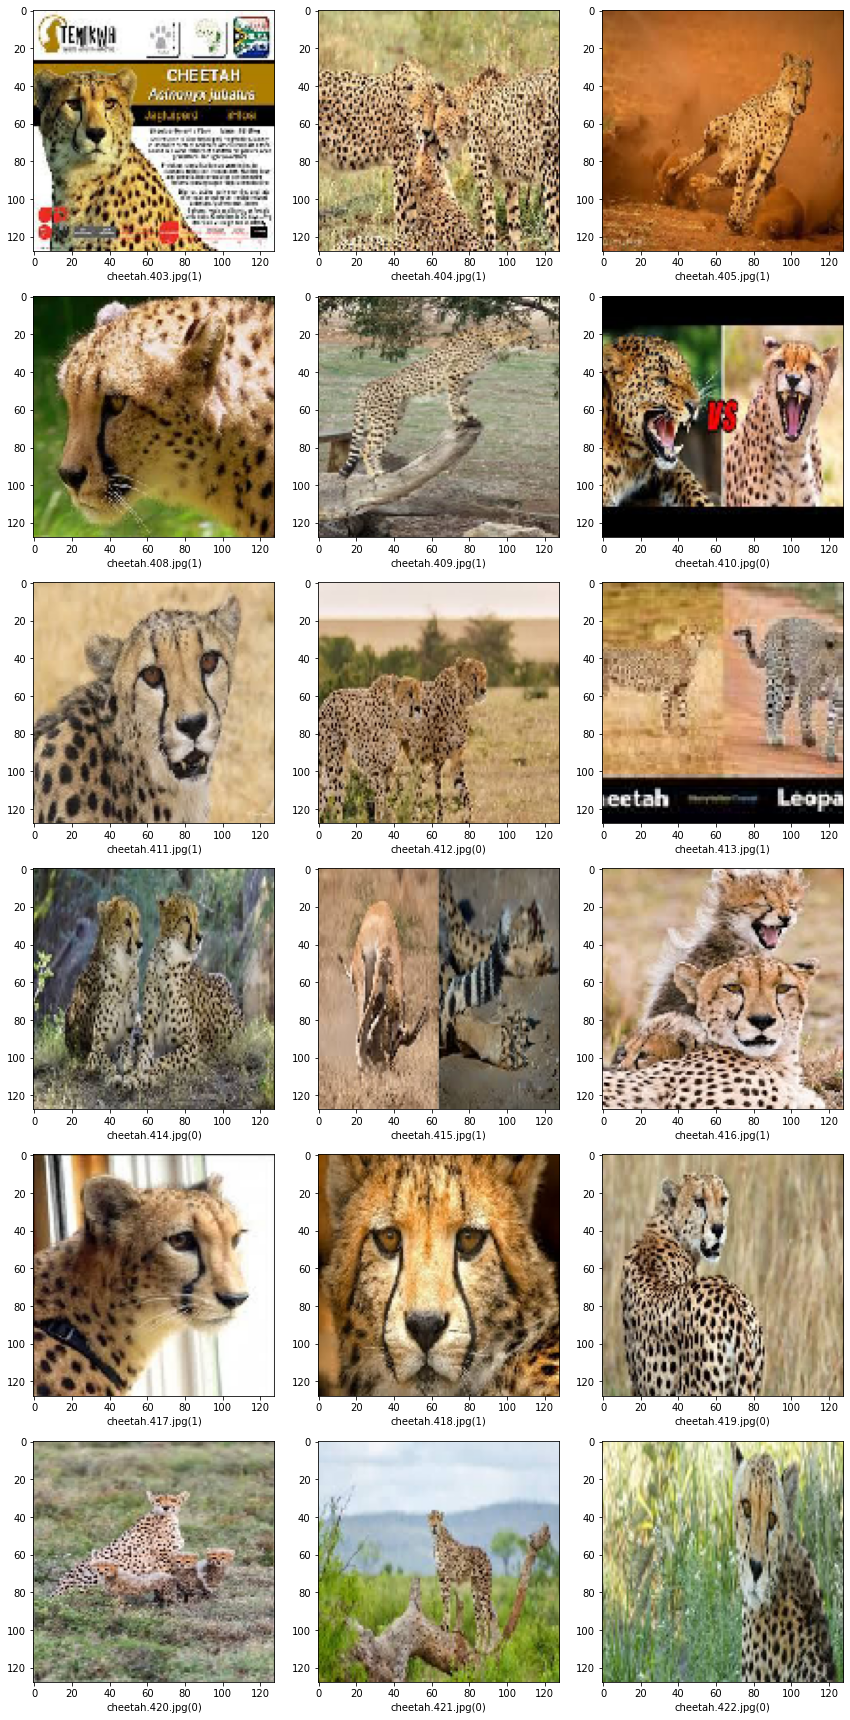

In [20]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("D:/Deep learn2/test1/"+filename, target_size=Image_Size)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

In [25]:
#Manual tests
results={
    0:'lion',
    1:'cheetah'
}
from PIL import Image
import numpy as np
im=Image.open("D:/Deep learn/test2/v.jpg")
im=im.resize(Image_Size)
im=np.expand_dims(im,axis=0)
im=np.array(im)
im=im/255
pred=model.predict_classes([im])[0]
print(pred,results[pred])

1 cheetah


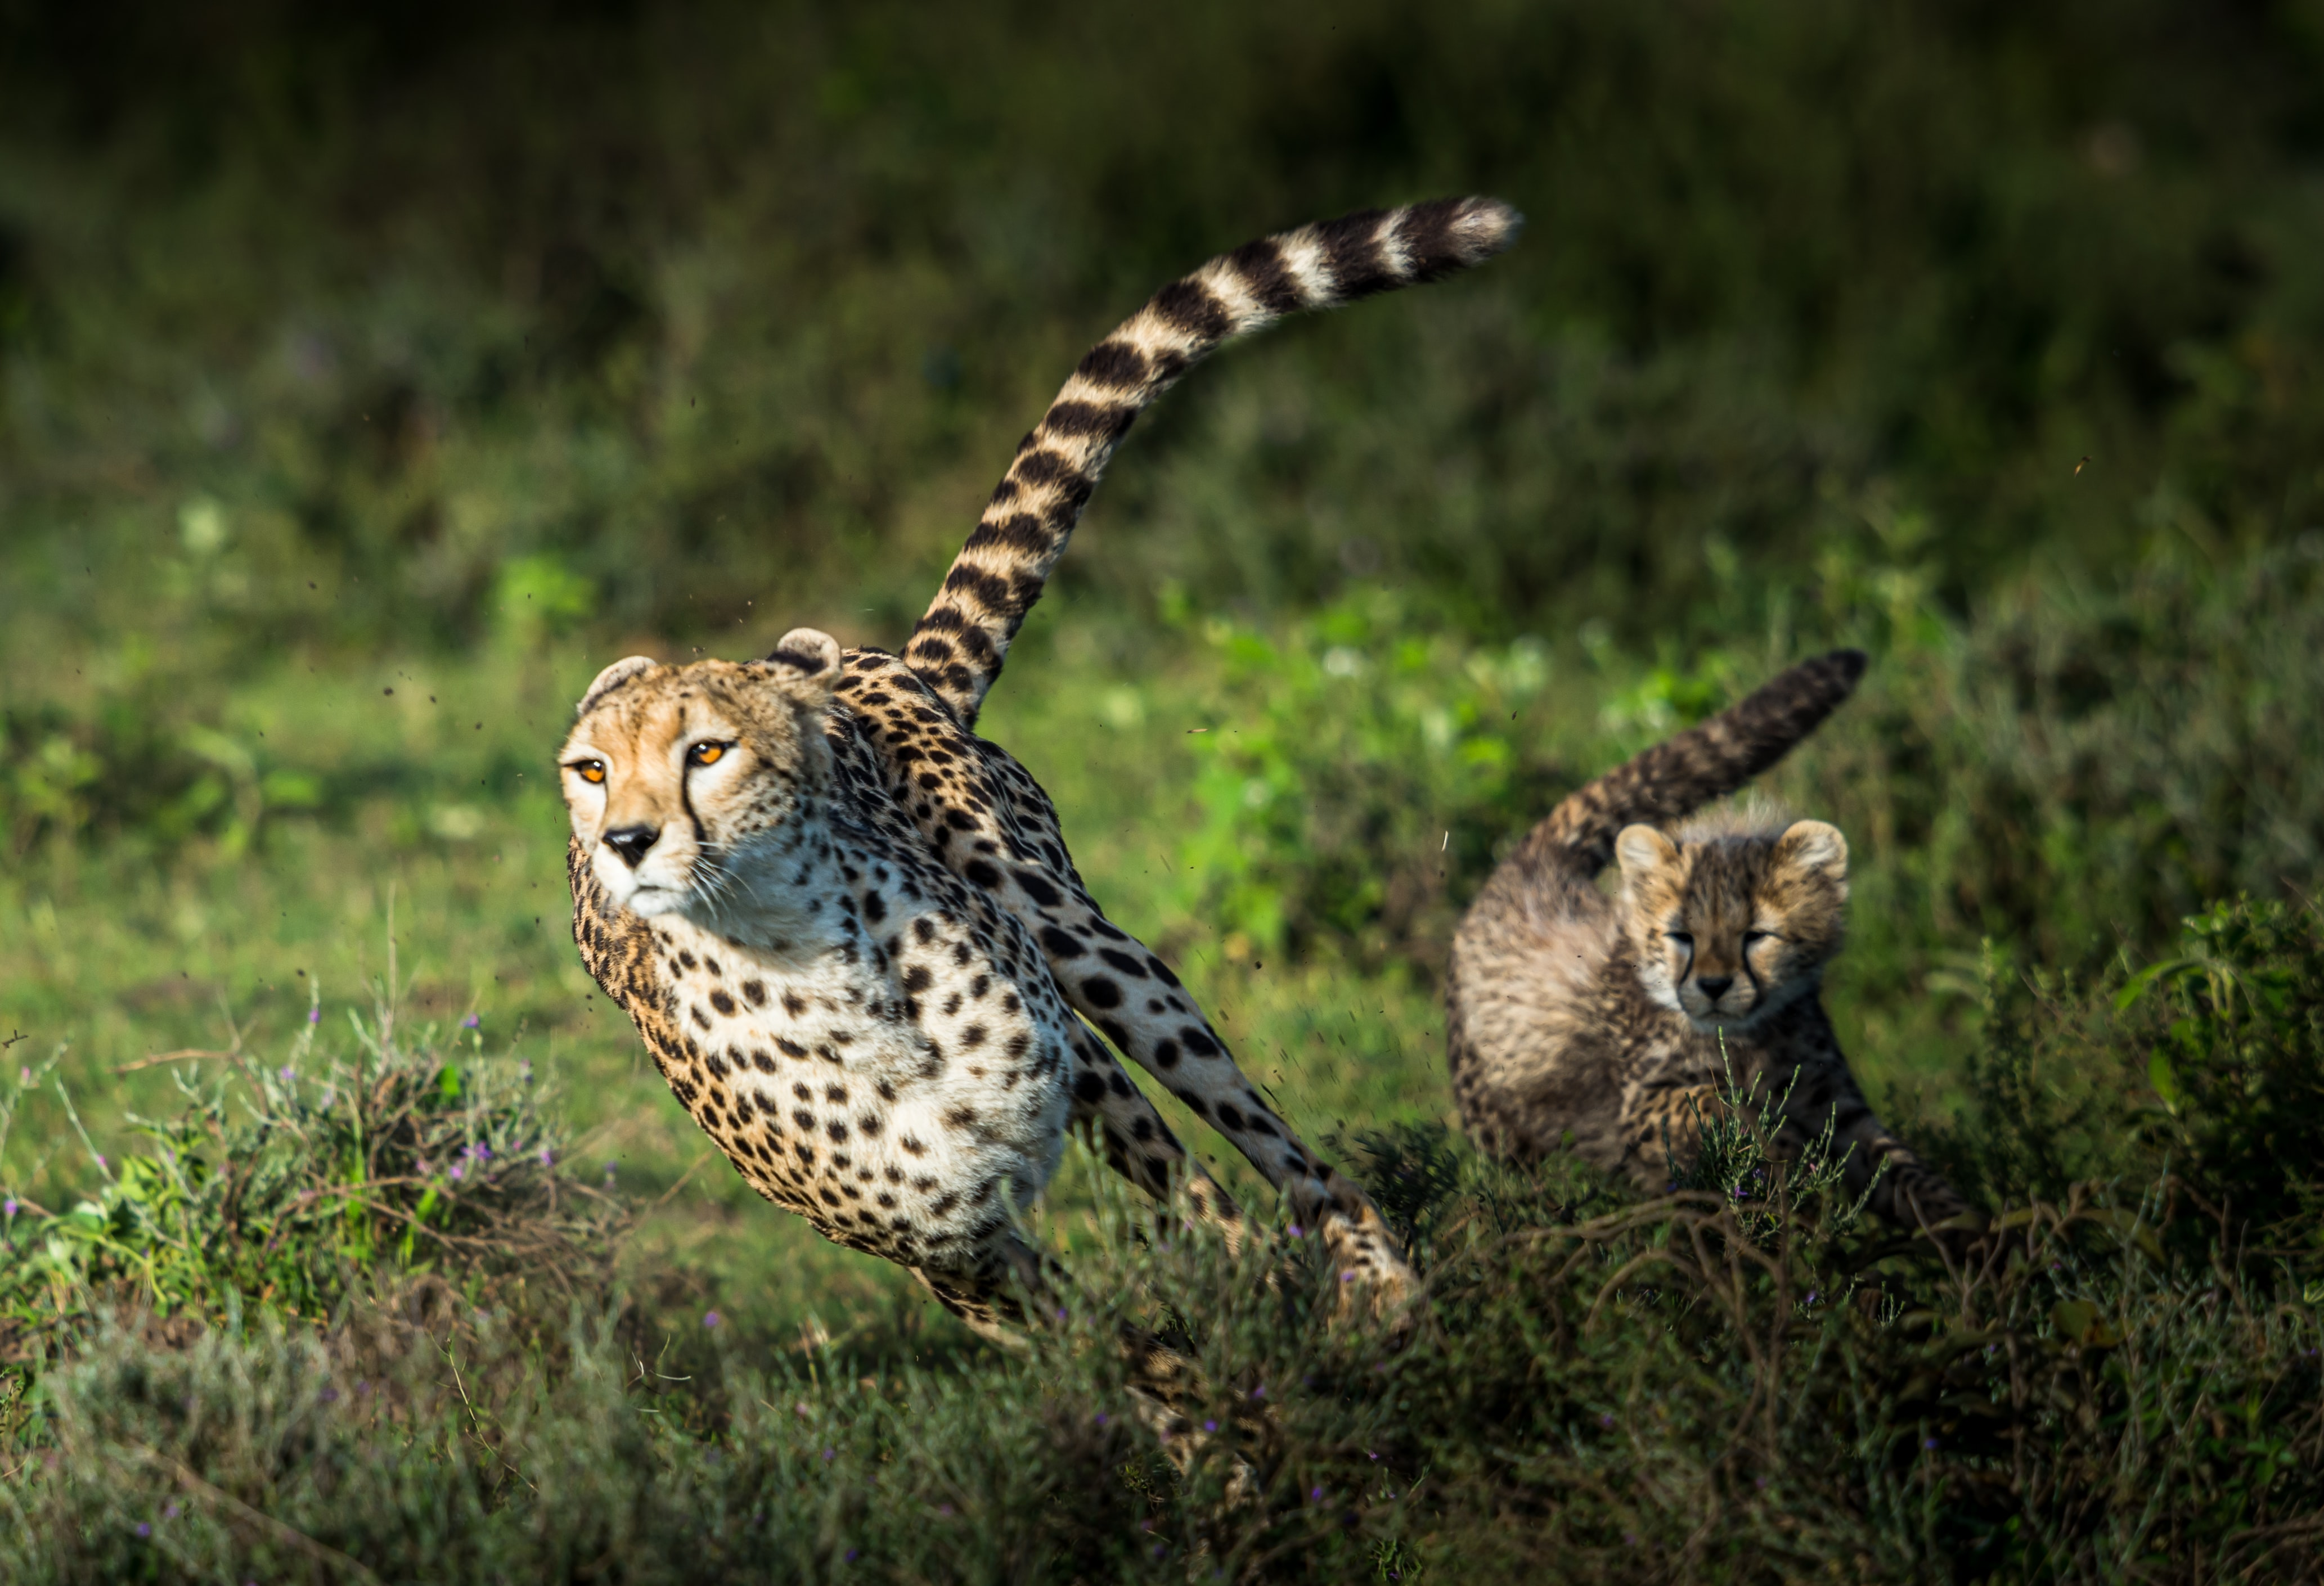

In [28]:
from IPython import display
display.Image("D:/Deep learn/test2/v.jpg")